In [46]:
import seaborn as sns
import pandas as pd
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount 

In [47]:
## 1.What is the average tip amount 
Average_tip = tips['tip'].mean()
format(Average_tip,'.6f') #The average tip

'2.998279'

In [48]:
## 2.What is the average bill amount
Average_bill = tips['total_bill'].mean()
format(Average_bill,'.5f')

'19.78594'

In [49]:
## 3.What is the average tip by gender
Tip_gender = tips.groupby('sex')['tip'].mean()
print("The average tip by gender:"'\n', Tip_gender)

The average tip by gender:
 sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


In [50]:
## 4.What is the average tip on a sunday by gender
Tip_day = tips.groupby(['day','sex'])[['tip']].mean()
print("The average tip in Sunday by gender:"'\n''\n', Tip_day)

The average tip in Sunday by gender:

                   tip
day  sex             
Thur Male    2.980333
     Female  2.575625
Fri  Male    2.693000
     Female  2.781111
Sat  Male    3.083898
     Female  2.801786
Sun  Male    3.220345
     Female  3.367222


In [51]:
## Should be Check
## 5.Which party size gives the maximum tip as a percent of total bill amount 
tips['tip percentage'] = (tips['tip']/tips['total_bill']*100)
tips.max()

total_bill          50.81
tip                    10
sex                  Male
smoker                Yes
day                  Thur
time                Lunch
size                    6
tip percentage    71.0345
dtype: object

### GRADED
    - Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
    - Generate the plots using matplotlib, bokeh and seaborn


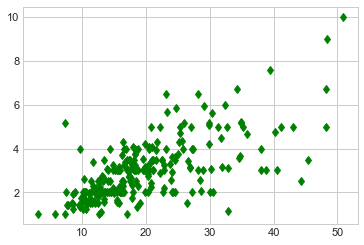

In [52]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
A = tips['tip']
B = tips['total_bill']

##Creating the plot output
plt.plot(B, A, 'd', color='green')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


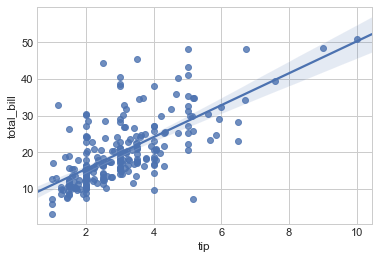

In [53]:
import seaborn as sns

##Creating plot output
sns.regplot(x=tips['tip'], y=tips['total_bill'], fit_reg=True)

In [54]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

y=tips['tip']
x=tips['total_bill']


p = figure(plot_height=300,plot_width=300) ## Assigning the size of plot.

p.scatter(tips['tip'],tips['total_bill'], color = 'red', alpha=0.5)## Making the plot.
show(p) ## Result of the plot.

### GRADED
    - Generate a box plot that shows average bill amount by day of week
    - Generate a box plot that shows average bill amount by gender
    - Show the above two plots side by side
    - Generate the same plots using matplotlib and bokeh

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


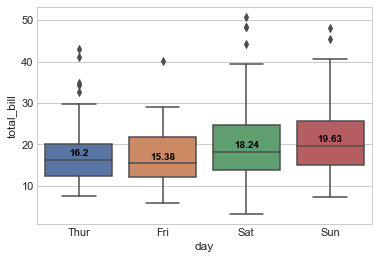

In [56]:
## Generate a box plot that shows average bill amount by day of week
import seaborn as sns
import numpy as np
aweek = sns.boxplot(x='day', y='total_bill', data=tips) ## Making the boxplot.

## Show the output text of the median.
medians = tips.groupby(['day'])['total_bill'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,aweek.get_xticklabels()):
    aweek.text(pos[tick], medians[tick] + 1, median_labels[tick], 
            horizontalalignment='center', size='small', color='black', weight='semibold')



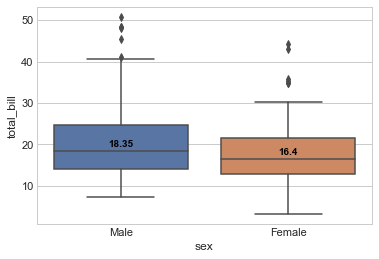

In [57]:
## Generate a box plot that shows average bill amount by gender
bgender = sns.boxplot(x='sex', y='total_bill', data=tips) ##Making boxplot.

## Show the output text of the median.
medians = tips.groupby(['sex'])['total_bill'].median().values ## Making the boxplot.
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,bgender.get_xticklabels()):
    bgender.text(pos[tick], medians[tick] + 1, median_labels[tick], 
            horizontalalignment='center', size='small', color='black', weight='semibold')

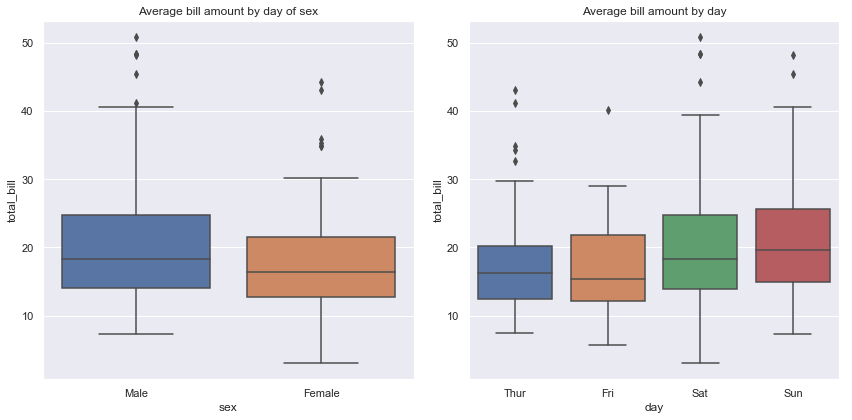

In [70]:
## Show the above two plots side by side.
## Defining the figure size
plt.figure(figsize=(12, 6))

## Show the mean bill amount by gender
plt.subplot(1,2,1) #Row, column, plot
sns.boxplot(x="sex", y='total_bill', data = tips) #output plot
plt.title('Average bill amount by day of sex')

## Showing average bill amount by day of week
plt.subplot(1,2,2) #Row, column, plot
sns.boxplot(x="day", y='total_bill', data = tips) #output plot
plt.title('Average bill amount by day')

plt.tight_layout()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
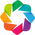

:Layout
   .BoxWhisker.Average_bill_amount_by_Days   :BoxWhisker   [day]   (total_bill)
   .BoxWhisker.Average_bill_amount_by_gender :BoxWhisker   [sex]   (total_bill)

In [59]:
## Generate the same plots using bokeh.
import holoviews as hv #Installing extra package to work with bokeh
hv.extension('bokeh')

##Creating the 1st boxplot
title = "Average bill amount by Days"
boxwhisker = hv.BoxWhisker(tips,['day'],'total_bill', label=title)

##Creating the 2nd boxplot
title = "Average bill amount by gender"
boxwhisker1 = hv.BoxWhisker(tips,['sex'], 'total_bill', label=title)

## Making the outputs
boxwhisker + boxwhisker1

[Text(0,0,'Male'), Text(0,0,'Female')]

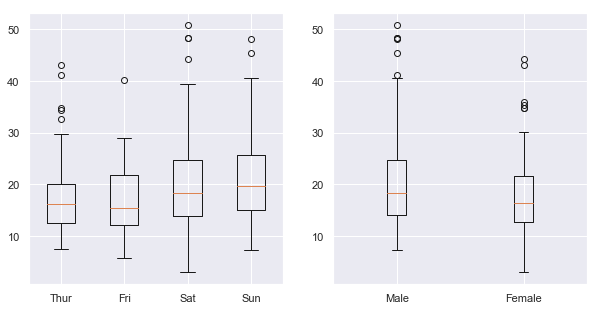

In [68]:
## Generate the same plots using matplotlib.

import matplotlib.pyplot as plt

#Need to re-create data from raw.
Th = tips.loc[tips['day']=='Thur']   
Fr = tips.loc[tips['day']=='Fri']
Sa = tips.loc[tips['day']=='Sat']
Su = tips.loc[tips['day']=='Sun']
M = tips.loc[tips['sex']=='Male']
F = tips.loc[tips['sex']=='Female']

## Plot size
plt.figure(figsize = (10,5)) ## Limit the size of boxplot

#1st plot
plt.subplot(1,2,1)  ## placement of rows, columns, plot
plt.boxplot([Th['total_bill'],Fr['total_bill'],Sa['total_bill'],Su['total_bill']]) ## boxplot output
plt.gca().set_xticklabels(['Thur','Fri','Sat','Sun']) ##Names of the box plot

#2nd plot
plt.subplot(1,2,2)   ## placement of rows, columns, plot
plt.boxplot([M['total_bill'],F['total_bill']]) ##boxplot output
plt.gca().set_xticklabels(['Male','Female']) ## Names of the box plot



### GRADED
    - Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
    - Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
    - Are tips larger during lunch or dinner (as a percentage of total_bill)
    - Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
        - Answer the question by visual examination of lmplot output

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


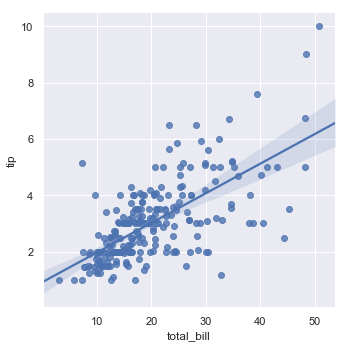

In [60]:
## Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
import seaborn as sns; sns.set(color_codes=True)
g = sns.lmplot(x="total_bill", y="tip", data=tips)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


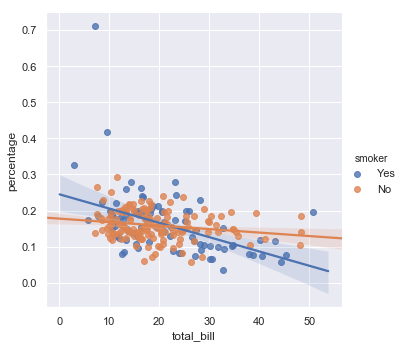

In [61]:
## Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
tips['percentage'] = tips['tip']/tips['total_bill']
g = sns.lmplot(x="total_bill", y='percentage', hue="smoker", data=tips)

## The argument result indicate that people who smoke, tip higher than people who do not smoke.
## The blue line ('Yes to smoking') shows has steeper slope than orange.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


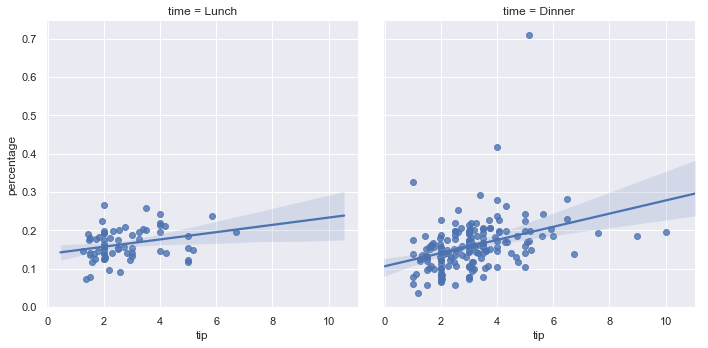

In [62]:
## Are tips larger during lunch or dinner (as a percentage of total_bill)
g = sns.lmplot(x="tip", y="percentage", col = 'time', data=tips)

## Based on previous question on steeper slope. Dinner has steeper slope than Lunch.
## Therefore, tips in dinner is higher than lunch.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


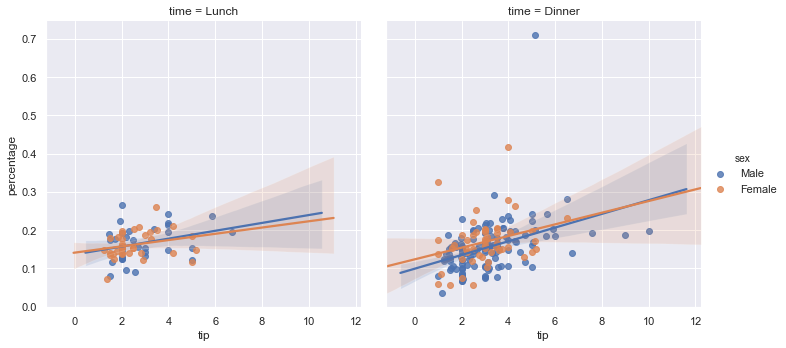

In [63]:
## Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
g = sns.lmplot(x="tip", y="percentage", hue="sex", col="time",data=tips, height=5)

## The output indicates, that during lunch time male tips the most compare to male. But, on dinner male and female are almost similliar in giving tips.
## There is not change between who tips the most during lunch and dinner, because male have steeper slope.
## But, during dinner the slope between male and female is close.